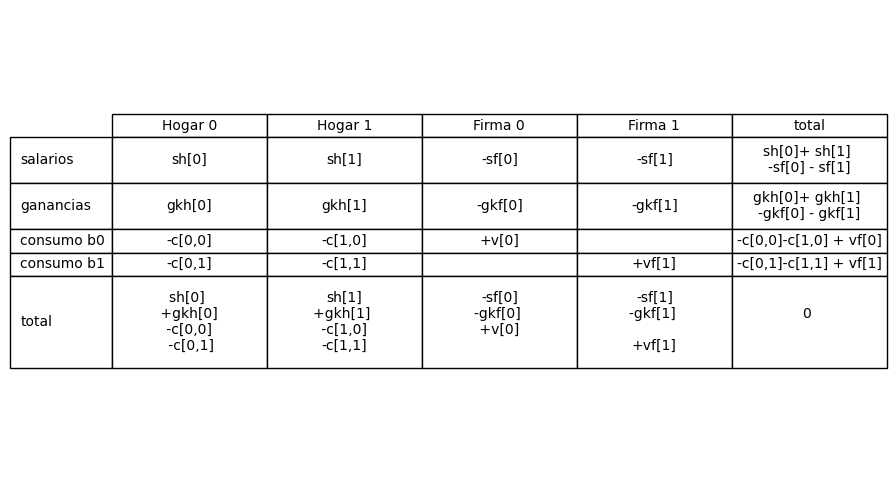

In [5]:
# programa para: definir la matriz de contabilidad social con:

# - dos hogares

# - dos firmas

#

# luego, incorporamos el problema de:

# - optimización de los consumidores, de los cuales tomamos sus demandas walrasianas

# - optimización de los productores, de los cuales tomamos su demanda de trabajo y de capital

#

# como etapa intermedia: generamos los valores numéricos 

# de la matriz de contabilidad social para un vector de precios dado

#

# finalmente, resolvemos el sistema de ecuaciones y 

# generamos la matriz de contabilidad social "cuadrada" o "equilibrada"



import pandas as pd

import matplotlib.pyplot as plt

import numpy as np





import math



sh = np.zeros(2) # salarios recibidos por los hogares

sf = np.zeros(2) # salarios pagados por las firmas

gkh = np.zeros(2) # ganacias por servicios de capital recibidos por los hogares

gkf = np.zeros(2) # gastos por servicios de capital pagados por las firmas

c = np.zeros((2, 2), dtype=float) #  consumos C[i,j]  i es el hogar, j  es el bien

vf = np.zeros(2) # vemtas por las firmas

# Create a DataFrame with the desired variables (using '\n' for line breaks in the problematic cells)

data = [

    ['sh[0]', 'sh[1]', '-sf[0]', '-sf[1]','sh[0]+ sh[1] \n-sf[0] - sf[1]'],

    ['gkh[0]', 'gkh[1]', '-gkf[0]', '-gkf[1]', 'gkh[0]+ gkh[1] \n-gkf[0] - gkf[1]'],

    ['-c[0,0]', '-c[1,0]', '+v[0]','' ,'-c[0,0]-c[1,0] + vf[0]'],

    ['-c[0,1]', '-c[1,1]','', '+vf[1]', '-c[0,1]-c[1,1] + vf[1]']

]



s1 = f"{data[0][0]} \n +{data[1][0]} \n {data[2][0]} \n {data[3][0]}"

s2 = f"{data[0][1]}\n+{data[1][1]} \n {data[2][1]} \n{data[3][1]}"

s3 = f"{data[0][2]}\n{data[1][2]} \n {data[2][2]} \n{data[3][2]}"

s4 = f"{data[0][3]}\n{data[1][3]} \n {data[2][3]} \n{data[3][3]}"



new_row = [s1, s2, s3, s4, '0 \n   ']



data.append(new_row)



row_labels = ['salarios', 'ganancias', 'consumo b0', 'consumo b1', 'total']

columns = ['Hogar 0', 'Hogar 1', 'Firma 0', 'Firma 1', 'total']



# Crear el DataFrame

df = pd.DataFrame(data, columns=columns, index=row_labels)



# Función para calcular la altura de la celda según el número de líneas

def calculate_cell_height(cell_text, base_height=0.05):

    # Contar el número de líneas (se cuentan los '\n')

    num_lines = cell_text.count('\n') + 1  # al menos 1 línea aunque no haya '\n'

    return base_height * num_lines



# Graficar la tabla usando matplotlib

fig, ax = plt.subplots(figsize=(10, 6))  # Establecer tamaño de la figura

ax.axis('tight')

ax.axis('off')



# Crear la tabla

table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc='center', loc='center')



# Ajustar el tamaño de la fuente

table.auto_set_font_size(False)

table.set_fontsize(10)



# Ajustar la altura de las filas automáticamente según el contenido

for i in range(len(df)+1):  # Recorremos las filas

    # Calcular la altura máxima de todas las celdas en la fila

    max_height = max(calculate_cell_height(cell.get_text().get_text()) for (row, col), cell in table.get_celld().items() if row == i)

    # Ajustar la alt
    # Ajustar la altura de las filas automáticamente según el contenido

for i in range(len(df)+1):  # Recorremos las filas

    # Calcular la altura máxima de todas las celdas en la fila

    max_height = max(calculate_cell_height(cell.get_text().get_text()) for (row, col), cell in table.get_celld().items() if row == i)

    # Ajustar la altura de todas las celdas en la fila con la altura máxima

    for (row, col), cell in table.get_celld().items():

        if row == i:

            cell.set_height(max_height)

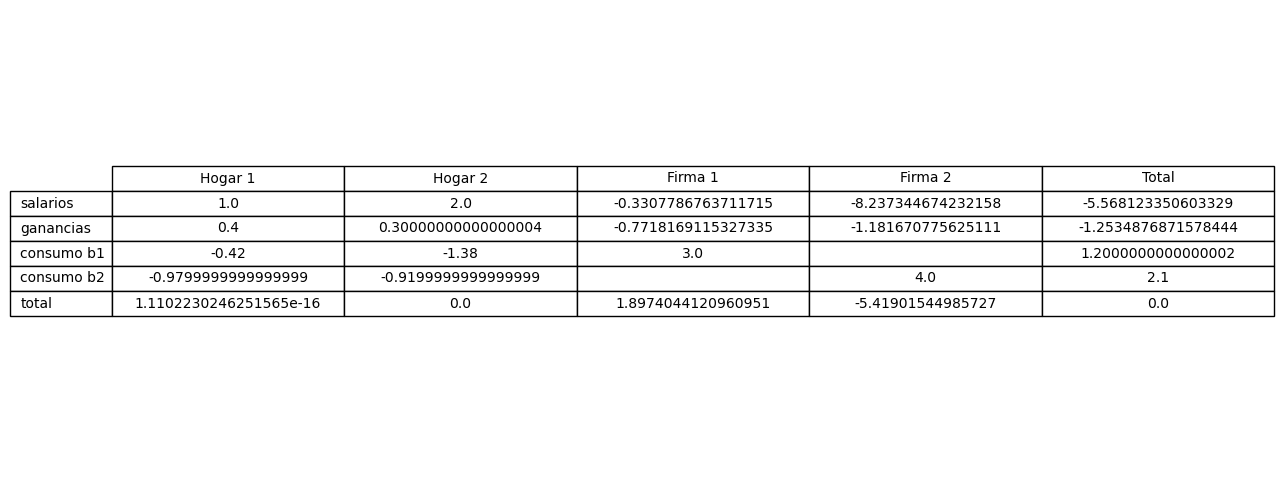

In [7]:
#definimos los parametros de los hogares y las empresas



alpha_H0 = 0.3

alpha_H1 = 0.6



alpha_F0 = 0.3

beta_F0 = 1-alpha_F0  # rendimientos constantes de escala



alpha_F1 = 0.4

beta_F1 = 1-alpha_F1  # rendimientos constantes de escala





L0 = 1  # trabajo que oferta, inelasticamente, hogar 0

L1 = 2  # trabajo que oferta, inelasticamente, hogar 1

K0 = 4  # capital que oferta, inelasticamente, hogar 0

K1 = 3  # capital que oferta, inelasticamente, hogar 1





# vector precios 

w = 1

r = 0.1

p0 = 1

p1 = 1

q0 = 3

q1 = 4







sh[0] = w*L0

sh[1] = w*L1





#  variable pagos a capital totales que reciben los hogares

gkh[0] = r*K0

gkh[1] = r*K1



# generamos las demandas de los bienes, en dólares

c[0,0] = alpha_H0*(sh[0]+gkh[0])





c[1,0] = alpha_H1*(sh[1]+gkh[1])





c[0,1] = (1-alpha_H0)*(sh[0]+gkh[0])

c[1,1] = (1-alpha_H1)*(sh[1]+gkh[1])





# demandas de capital y trabajo de las firmas



kd = np.zeros(2)

ld = np.zeros(2)



# del problema de maximización de ganancias del productor, 

# rescatamos las funciones de demanda de trabajo, capital y costo marginal (multiplicador de lagrange)



def k_d0(q, r, w):



    return (q**(1/(alpha_F0+beta_F0)))*((w*beta_F0/(r*alpha_F0))**(alpha_F0/(alpha_F0+beta_F0)))





def k_d1(q, r, w):



    return (q**(1/(alpha_F1+beta_F1)))*((w*beta_F1/(r*alpha_F1))**(alpha_F1/(alpha_F1+beta_F1)))





def l_d0(q, r, w):



    return (q**(1/(alpha_F0+beta_F0)))*((w*beta_F0/(r*alpha_F0))**(-beta_F0/(alpha_F0+beta_F0)))



def l_d1(q, r, w):



    return (q**(1/(alpha_F1+beta_F1)))*((w*beta_F1/(r*alpha_F1))**(-beta_F1/(alpha_F1+beta_F1)))



def cmg_0(q):

    aa= (1/(alpha_F0+beta_F0))*((q**(1-(alpha_F0+beta_F0)))*(w**(alpha_F0))*(r**(beta_F0)))**(1/(alpha_F0+beta_F0))  

    return aa*((alpha_F0/beta_F0)**(beta_F0/(alpha_F0+beta_F0))+(alpha_F0/beta_F0)**(-alpha_F0/(alpha_F0+beta_F0)))





def cmg_0(q):

    aa= (1/(alpha_F0+beta_F0))*((q**(1-(alpha_F0+beta_F0)))*(w**(alpha_F0))*(r**(beta_F0)))**(1/(alpha_F0+beta_F0))  

    return aa*((alpha_F0/beta_F0)**(beta_F0/(alpha_F0+beta_F0))+(alpha_F0/beta_F0)**(-alpha_F0/(alpha_F0+beta_F0)))



def cmg_1(q):

    aa= (1/(alpha_F1+beta_F1))*((q**(1-(alpha_F1+beta_F1)))*(w**(alpha_F1))*(r**(beta_F1)))**(1/(alpha_F1+beta_F1))  

    return aa*((alpha_F1/beta_F1)**(beta_F1/(alpha_F1+beta_F1))+(alpha_F1/beta_F1)**(-alpha_F1/(alpha_F1+beta_F1)))







sf[0] = l_d0(q0,r,w)*w

sf[1] = l_d1(q1,i,w)*w



gkf[0] = k_d0(q0, r, w)*r

gkf[1] = k_d1(q1, r, w)*r



vf[0] = p0*q0

vf[1] = p1*q1


# Crear una lista de datos con los cálculos correspondientes en lugar de nombres de variables





data_numeric = [

    [sh[0], sh[1], -sf[0], -sf[1], sh[0]+ sh[1] -sf[0] - sf[1]],

    [gkh[0], gkh[1], -gkf[0], -gkf[1], gkh[0]+ gkh[1] -gkf[0] - gkf[1]],

    [-c[0,0], -c[1,0], +vf[0],'' ,-c[0,0]-c[1,0] + vf[0]],

    [-c[0,1], -c[1,1],'', +vf[1], -c[0,1]-c[1,1] + vf[1]]

]





s1_numeric = data_numeric[0][0] + data_numeric[1][0] + data_numeric[2][0] + data_numeric[3][0]

s2_numeric = data_numeric[0][1] + data_numeric[1][1] + data_numeric[2][1] + data_numeric[3][1]

s3_numeric = data_numeric[0][2] + data_numeric[1][2] +  data_numeric[2][2]

s4_numeric = data_numeric[0][3] + data_numeric[1][3] + data_numeric[3][3]







new_row_numeric = [s1_numeric, s2_numeric, s3_numeric, s4_numeric, 0]







# Añadir la nueva fila  a los datos numéricos

data_numeric.append(new_row_numeric)



# Definir etiquetas de filas y columnas

row_labels = ['salarios', 'ganancias', 'consumo b1', 'consumo b2', 'total']

columns = ['Hogar 1', 'Hogar 2', 'Firma 1', 'Firma 2', 'Total']



# Crear el DataFrame

df_numeric = pd.DataFrame(data_numeric, columns=columns, index=row_labels)



# Graficar la tabla usando matplotlib

fig, ax = plt.subplots(figsize=(10, 6))  # Establecer tamaño de la figura

ax.axis('tight')

ax.axis('off')

table = ax.table(cellText=df_numeric.values, colLabels=df_numeric.columns, rowLabels=df_numeric.index, cellLoc='center', loc='center')

table.auto_set_font_size(False)

table.set_fontsize(10)  # Ajustar el tamaño de la fuente según sea necesario

table.scale(1.5, 1.5)  # Ajustar la escala para que todo encaje bien



plt.show()